#### Import Reviews file

In [1]:
import pandas as pd

df_imported = pd.read_csv('../datasets/init/Reviews.csv', sep = ',')
display(df_imported.head(3)) # Basic check

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


#### Dataset info

In [2]:
FOCUS_GROUP = ['Id', 'Score', 'Summary']
display(df_imported[FOCUS_GROUP].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       568454 non-null  int64 
 1   Score    568454 non-null  int64 
 2   Summary  568427 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.0+ MB


None

#### Clean data

In [3]:
FOCUS_GROUP = ['Id', 'Score', 'Summary']
df_cleaned = df_imported.dropna(subset = FOCUS_GROUP)
df_cleaned.drop_duplicates(subset = FOCUS_GROUP)
print('Init data is cleaned')

Init data is cleaned


#### Score structure

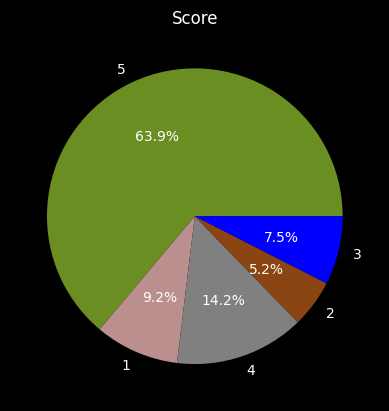

In [4]:
import numpy as np
import matplotlib.pyplot as plt

scores = np.array(df_cleaned['Score'])
elements = {}
for i in scores:
    elements.setdefault(int(i), 0)
    elements[int(i)] += 1

labels = [key for key, value in elements.items()]
sizes = [value for key, value in elements.items()]
colors = ['olivedrab', 'rosybrown', 'gray', 'saddlebrown', 'blue']

plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%', colors = colors)
ax.set_title('Score')
plt.show()

#### Save claned data

In [5]:
output_path = '../datasets/cleaned/Reviews.csv'
df_cleaned.to_csv(path_or_buf = output_path, sep = ',')